# Consumo de alcohol

Sabéis que nos preocupa mucho la salud de los ciudadanos. Por eso nos han encargado hacer un análisis sobre el consumo de alcohol.

Los datos de referencia los encontraréis aquí: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

Nos interesa conocer el consumo de alcohol, por tipo de bebida alcohólica para los distintos continentes y países. Además, sabiendo que el vino y la cerveza son los sospechosos habituales, podéis disponer estadísticas sobre estos dos casos en particular.

In [18]:
#importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#importamos los datos

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

alcohol_df = pd.read_csv(url, index_col= 'country')

alcohol_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
...,...,...,...,...,...
Venezuela,333,100,3,7.7,SA
Vietnam,111,2,1,2.0,AS
Yemen,6,0,0,0.1,AS


In [20]:
# ver los datos 

alcohol_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 193 non-null    int64  
 1   spirit_servings               193 non-null    int64  
 2   wine_servings                 193 non-null    int64  
 3   total_litres_of_pure_alcohol  193 non-null    float64
 4   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 9.0+ KB


In [21]:
#descripcion de los datos

alcohol_df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [22]:
set(alcohol_df['continent'])

{'AF', 'AS', 'EU', 'OC', 'SA', nan}

In [23]:
alcohol_df['continent'].fillna('NA', inplace=True)# sustituyo los NaN por NA por NorteAmerica

In [24]:
alcohol_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 193 non-null    int64  
 1   spirit_servings               193 non-null    int64  
 2   wine_servings                 193 non-null    int64  
 3   total_litres_of_pure_alcohol  193 non-null    float64
 4   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 9.0+ KB


In [25]:
set(alcohol_df['continent'])

{'AF', 'AS', 'EU', 'NA', 'OC', 'SA'}

In [26]:
alcohol_df.describe(include='all')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193.000000,193.000000,193.000000,193.000000,193
unique,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,AF
freq,NaN,NaN,NaN,NaN,53
mean,106.160622,80.994819,49.450777,4.717098,NaN
std,101.143103,88.284312,79.697598,3.773298,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,20.000000,4.000000,1.000000,1.300000,NaN
50%,76.000000,56.000000,8.000000,4.200000,NaN
75%,188.000000,128.000000,59.000000,7.200000,NaN


In [27]:
#consumo total por continent de cada tipo de alcohol

total_consumption_by_continent = alcohol_df.groupby('continent').sum()

total_consumption_by_continent

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
NA,3345,3812,564,137.9
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [28]:
import pandas as pd

# Calcula el consumo total por continente
total_consumption_by_continent = alcohol_df.groupby('continent').sum()

# Crea la tabla pivotante con valores normalizados
pivot_result = alcohol_df.pivot_table(values=alcohol_df.iloc[0:4], index='continent')

# Normaliza los valores dividiendo por el consumo total del continente
for col in ['beer_servings', 'wine_servings', 'spirit_servings']:
    pivot_result[col] = pivot_result[col] / total_consumption_by_continent[col]


print(pivot_result)


           beer_servings  spirit_servings  total_litres_of_pure_alcohol  \
continent                                                                 
AF              0.018868         0.018868                      3.007547   
AS              0.022727         0.022727                      2.170455   
EU              0.022222         0.022222                      8.617778   
NA              0.043478         0.043478                      5.995652   
OC              0.062500         0.062500                      3.381250   
SA              0.083333         0.083333                      6.308333   

           wine_servings  
continent                 
AF              0.018868  
AS              0.022727  
EU              0.022222  
NA              0.043478  
OC              0.062500  
SA              0.083333  


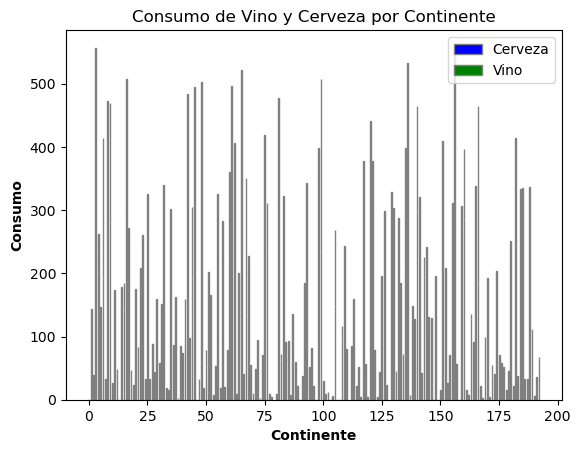

In [43]:


import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que alcohol_df es tu DataFrame y ya está definido

# Definir la posición de las barras en el eje X
barWidth = 0.35
alcohol_df['continent']

# Crear las barras para 'Cerveza'
plt.bar(r1, alcohol_df['beer_servings'], color='b', width=barWidth, edgecolor='grey', label='Cerveza')

# Crear las barras para 'Vino'
plt.bar(r1, alcohol_df['wine_servings'], color='g', width=barWidth, edgecolor='grey', label='Vino', bottom=alcohol_df['beer_servings'])

# Añadir etiquetas y título
plt.xlabel('Continente', fontweight='bold')
plt.ylabel('Consumo', fontweight='bold')
plt.title('Consumo de Vino y Cerveza por Continente')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



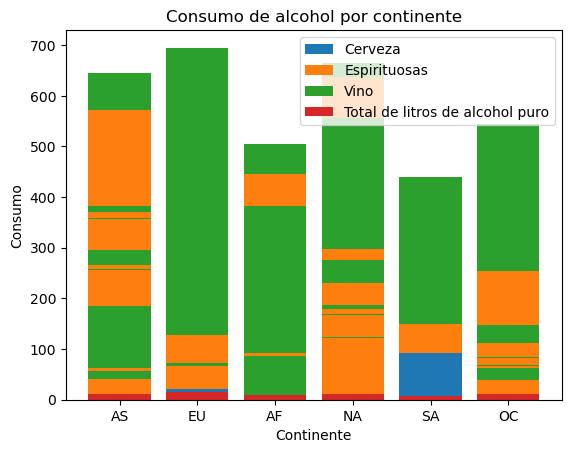

In [30]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear las barras para cada tipo de alcohol
ax.bar(alcohol_df['continent'], alcohol_df['beer_servings'], label='Cerveza')
ax.bar(alcohol_df['continent'], alcohol_df['spirit_servings'], bottom=alcohol_df['beer_servings'], label='Espirituosas')
ax.bar(alcohol_df['continent'], alcohol_df['wine_servings'], bottom=alcohol_df['beer_servings'] + alcohol_df['spirit_servings'], label='Vino')
ax.bar(alcohol_df['continent'], alcohol_df['total_litres_of_pure_alcohol'], label='Total de litros de alcohol puro')

# Personalizar el gráfico
ax.set_xlabel('Continente')
ax.set_ylabel('Consumo')
ax.set_title('Consumo de alcohol por continente')
ax.legend()

# Mostrar el gráfico
plt.show()


In [31]:
consumos_totales = alcohol_df.groupby('continent')['total_litres_of_pure_alcohol'].describe()

consumos_totales

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,3.007547,2.647557,0.0,0.70,2.30,4.700,9.1
AS,44.0,2.170455,2.770239,0.0,0.10,1.20,2.425,11.5
EU,45.0,8.617778,3.358455,0.0,6.60,10.00,10.900,14.4
NA,23.0,5.995652,2.409353,2.2,4.30,6.30,7.000,11.9
OC,16.0,3.381250,3.345688,0.0,1.00,1.75,6.150,10.4
SA,12.0,6.308333,1.531166,3.8,5.25,6.85,7.375,8.3


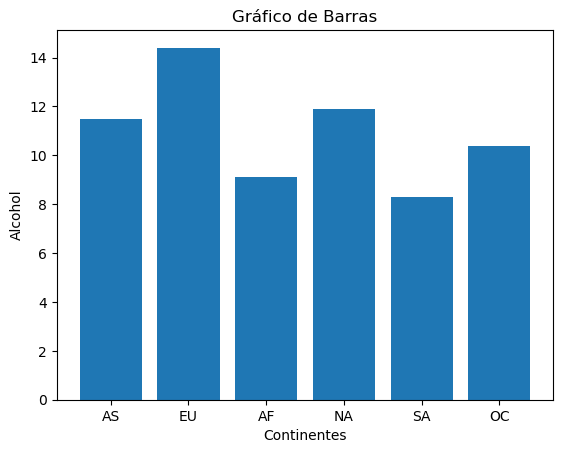

In [32]:
plt.bar(alcohol_df['continent'], alcohol_df['total_litres_of_pure_alcohol'])
plt.xlabel('Continentes')
plt.ylabel('Alcohol')
plt.title('Gráfico de Barras')
plt.show()

In [33]:
alcohol_df.groupby('continent')['beer_servings'].agg([min,max,np.mean,])

C:\Users\esetx\AppData\Local\Temp\ipykernel_16352\2145083017.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  alcohol_df.groupby('continent')['beer_servings'].agg([min,max,np.mean,])
C:\Users\esetx\AppData\Local\Temp\ipykernel_16352\2145083017.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  alcohol_df.groupby('continent')['beer_servings'].agg([min,max,np.mean,])
C:\Users\esetx\AppData\Local\Temp\ipykernel_16352\2145083017.py:1: FutureWarning: The provided callable <function mean at 0x000001811A8A8720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directl

,min,max,mean
continent,,,
AF,0,376,61.471698
AS,0,247,37.045455
EU,0,361,193.777778
NA,1,285,145.434783
OC,0,306,89.687500
SA,93,333,175.083333


In [34]:
plt.scatter(x=alcohol_df['continent'], y=alcohol_df['country'], s=profit_margin * 10)
plt.xlabel('Precio')
plt.ylabel('Ventas por día')
plt.title('Gráfico de Dispersión: Ventas vs. Precio')
plt.show()

KeyError: 'country'

In [ ]:
#meter un pivot table
#meter un boxplot
#hacer barras agrupados
#hacer un dataframe agregado
!pip install ydata-profilling

#export html,python script, pdf

In [ ]:
pip install ydata-profilling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ydata-profilling (from versions: none)
ERROR: No matching distribution found for ydata-profilling
